In [57]:
##########################################
## Time Series
## In-class Assignment 2
## Eric Maibach
## 02/20/2020
###########################################

#Load the data
D <- read.csv("https://nmimoto.github.io/datasets/gtemp.csv")
D1 <- ts(D, start=c(1), freq=1)
D2 <- diff(D1)

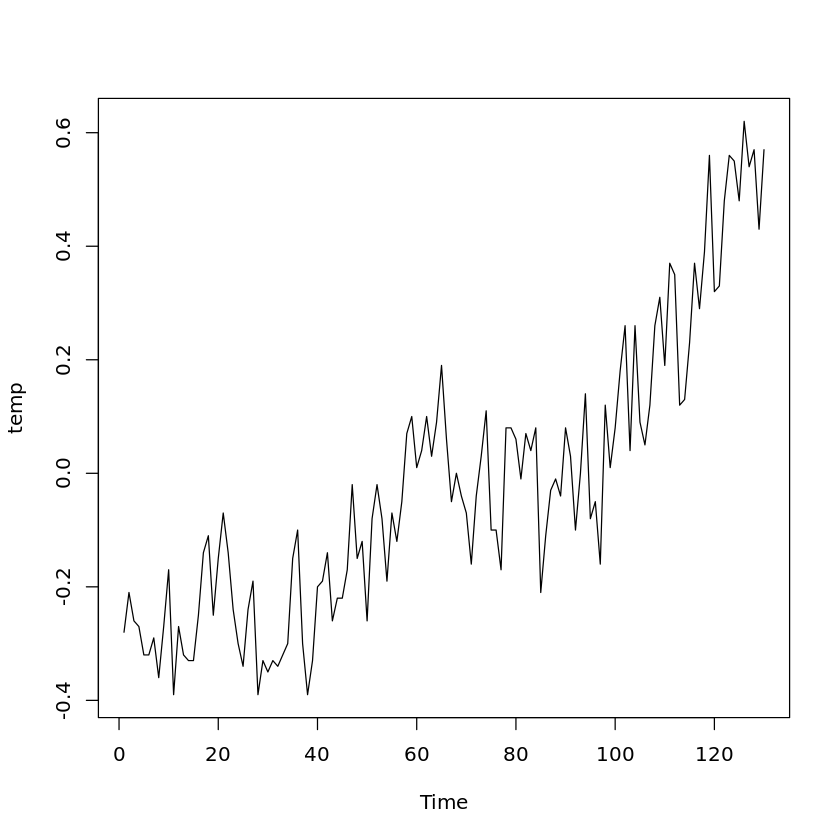

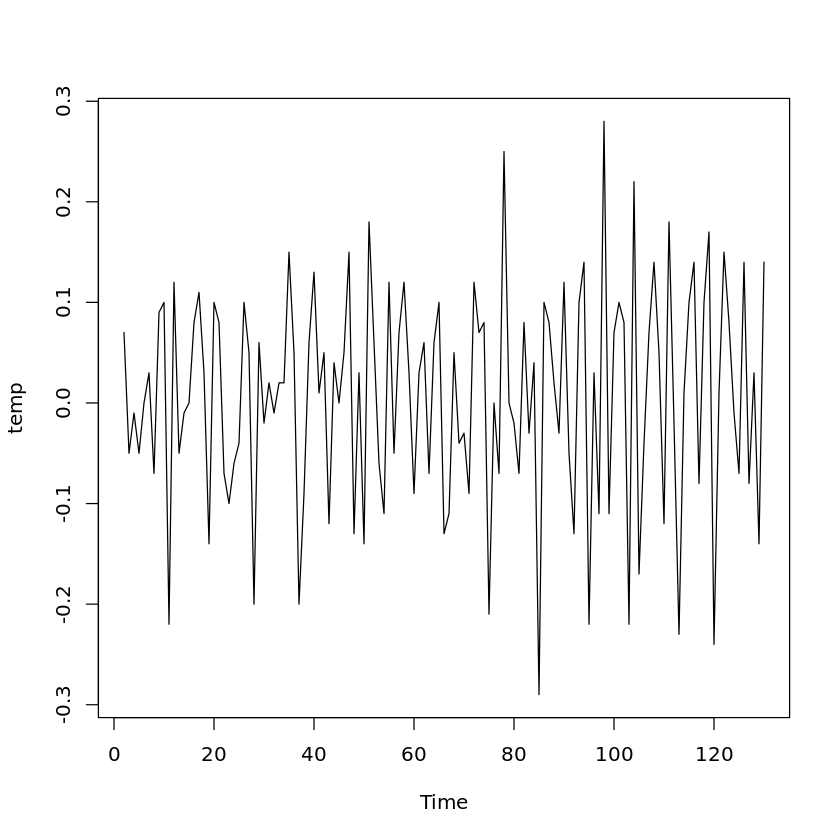

In [58]:
plot(D1)
plot(D2)

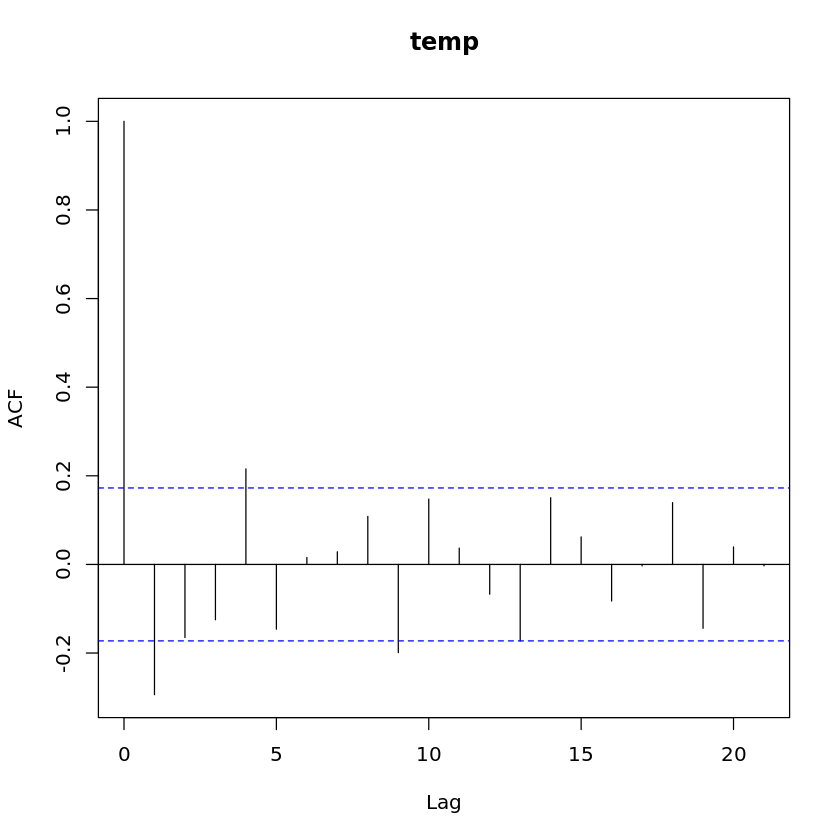

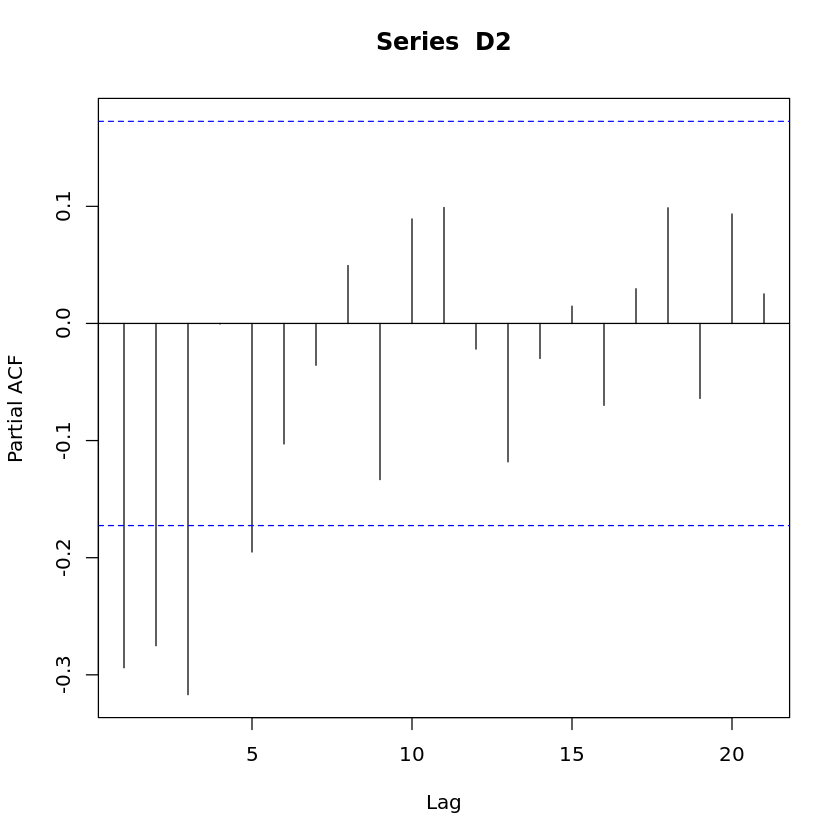

In [59]:
# 1) Does "D2" look like White Noise?  Or does it look like 
#    AR(p)?  Examine plot of ACF and PACF and explain briefly
################################################################
acf(D2)
pacf(D2)

In [60]:
# It appears to be AR(p).  The ACF seems to have the decreasing
# slope shape that we hope to see, and there are lags
# that are outside the confidence interval.  Looking at the PACF, 
# it appears to get to lag 3 before it is cut off.
##################################################################

# 2) Use auto.arima() function in forecast package to fit AR(p)
#    model using AICc as a best fit criteria.  What is the
#    suggested model?
##################################################################

#install.packages("forecast")

In [66]:
library(forecast)
Fit <- auto.arima(D2, d=0, max.q=0)

In [67]:
Fit

Series: D2 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
          ar1      ar2      ar3    mean
      -0.4610  -0.3897  -0.3143  0.0063
s.e.   0.0836   0.0861   0.0833  0.0039

sigma^2 estimated as 0.009342:  log likelihood=120.14
AIC=-230.27   AICc=-229.78   BIC=-215.97

In [38]:
# The suggested model is AR(3).

#################################################################

# 3) From AR(p) model suggested in part 2, investigate AR(p-1)
#    and AR(p+1).  Remove any parameters that has non-significant
#    parameter estimate.  What is your final AR model?
##################################################################

In [80]:
#Tests without mean
Fit2 = Arima(D2, order=c(2,0,0), include.mean = FALSE)
Fit2
Fit3 = Arima(D2, order=c(3,0,0), include.mean = FALSE)
Fit3
Fit4 = Arima(D2, order=c(4,0,0))
Fit4

Series: D2 
ARIMA(2,0,0) with zero mean 

Coefficients:
          ar1      ar2
      -0.3678  -0.2667
s.e.   0.0850   0.0851

sigma^2 estimated as 0.01033:  log likelihood=112.76
AIC=-219.51   AICc=-219.32   BIC=-210.93

Series: D2 
ARIMA(3,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3
      -0.4488  -0.3750  -0.3009
s.e.   0.0840   0.0864   0.0837

sigma^2 estimated as 0.009453:  log likelihood=118.88
AIC=-229.76   AICc=-229.44   BIC=-218.32

Series: D2 
ARIMA(4,0,0) with non-zero mean 

Coefficients:
          ar1      ar2      ar3     ar4    mean
      -0.4596  -0.3880  -0.3124  0.0043  0.0063
s.e.   0.0880   0.0932   0.0925  0.0882  0.0039

sigma^2 estimated as 0.009417:  log likelihood=120.14
AIC=-228.27   AICc=-227.58   BIC=-211.11

In [81]:
#Tests with mean
Fit2 = Arima(D2, order=c(2,0,0))
Fit2
Fit3 = Arima(D2, order=c(3,0,0))
Fit3
Fit4 = Arima(D2, order=c(4,0,0))
Fit4

Series: D2 
ARIMA(2,0,0) with non-zero mean 

Coefficients:
          ar1      ar2    mean
      -0.3742  -0.2742  0.0062
s.e.   0.0848   0.0849  0.0054

sigma^2 estimated as 0.01031:  log likelihood=113.42
AIC=-218.84   AICc=-218.52   BIC=-207.4

Series: D2 
ARIMA(3,0,0) with non-zero mean 

Coefficients:
          ar1      ar2      ar3    mean
      -0.4610  -0.3897  -0.3143  0.0063
s.e.   0.0836   0.0861   0.0833  0.0039

sigma^2 estimated as 0.009342:  log likelihood=120.14
AIC=-230.27   AICc=-229.78   BIC=-215.97

Series: D2 
ARIMA(4,0,0) with non-zero mean 

Coefficients:
          ar1      ar2      ar3     ar4    mean
      -0.4596  -0.3880  -0.3124  0.0043  0.0063
s.e.   0.0880   0.0932   0.0925  0.0882  0.0039

sigma^2 estimated as 0.009417:  log likelihood=120.14
AIC=-228.27   AICc=-227.58   BIC=-211.11

In [82]:
Fit3 = Arima(D2, order=c(3,0,0), include.mean = FALSE)
Fit3

Series: D2 
ARIMA(3,0,0) with zero mean 

Coefficients:
          ar1      ar2      ar3
      -0.4488  -0.3750  -0.3009
s.e.   0.0840   0.0864   0.0837

sigma^2 estimated as 0.009453:  log likelihood=118.88
AIC=-229.76   AICc=-229.44   BIC=-218.32

In [83]:
# Final model is AR(3).  It has the lowest AICc of -229.44.
# In AR(2), all parameters are significant, but it has
# a higher AIC.
# In AR(4), the ar4 parameter is not significant.

#############################################################

# 4) In your final AR model, what is the estmate for the 
#    standard deviation of the error term?  What is the
#    estimate of unconditional standard deviation?
#############################################################
sqrt(0.009453)
sd(D2)


[1] 0.09722654

[1] 0.1097048

In [42]:
# Estimate of standard deviation of the error in the 
# final model is 0.09723
# Estimate of unconditional stardard deviation is 0.109705

##################################################################

# 5) Perform the residual analysis using Randomness.tests()
#    provided on the class web site.  Is model fit adequate?
#    Comment on the quality of your residuals?
##################################################################
source("https://nmimoto.github.io/R/TS-00.txt")

  B-L test H0: the sereis is uncorrelated
  M-L test H0: the square of the sereis is uncorrelated
  J-B test H0: the sereis came from Normal distribution
  SD         : Standard Deviation of the series



BL15,BL20,BL25,ML15,ML20,JB,SD
0.314,0.359,0.538,0.528,0.404,0.395,0.096


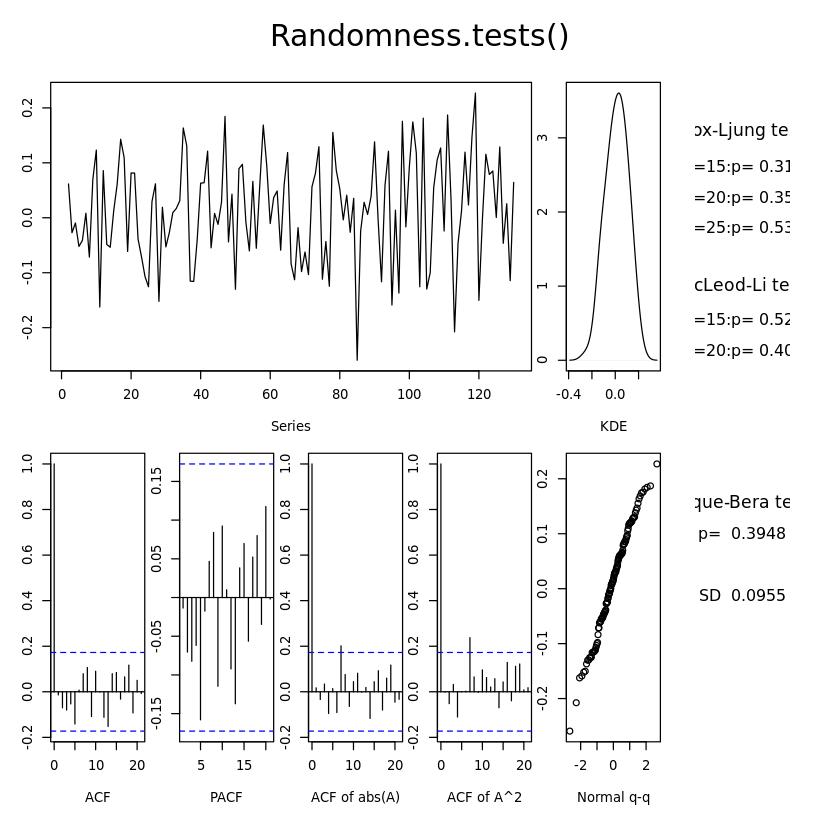

In [84]:
res <- Fit3$resid
Randomness.tests(res)

In [45]:
# McLeod-Li test for has a p-value of 0.528
# so we fail to reject the null hypothesis of uncorrelation.

# Jarque-Bera test has a p-value of 0.395 so we 
# fail to rject the null hypothesis of normality

# In addition the qqplot looks to be fairly close to 
# a straight line.
# ACF and PACF plots both appear to be white noise

#################################################################

# 6) There are 129 observations in D2.  Perform 1-month rolling
#    forecast of the data with model found in part 3.  Use
#    window size of 100, and predict the last 29 observations
#    1-month at a time in retrospective.  What is the prediction
#    root mean square?  Is the prediction satisfactory?  Is the
#    prediction rMSE close to what it was suggested by your 
#    model?
#################################################################

In [85]:
Y <- D2                # Entire data
window.size <- 100       # Window size for estimation
order.in <- c(3,0,0)     # model order

Yhat  <- Yhat.CIu <- Yhat.CIl <- 0        # initialize what needs to be saved
for (i in 1:(length(Y)-window.size)) {
  # Force to fit AR(3) each time on last 100 obs.
  Fit00 <- Arima( Y[i:(i+window.size-1)], order=order.in)     # <--- AR(2)
  
  Y.h  <- predict(Fit00, n.ahead=1)       # one step prediction
  Yhat[i]     <- Y.h$pred
  Yhat.CIu[i] <- Yhat[i]+1.96*Y.h$se
  Yhat.CIl[i] <- Yhat[i]-1.96*Y.h$se
}

#- Calculate prediction performance
Pred.error = Y[(window.size+1):length(Y)] - Yhat
Pred.rMSE =  sqrt(  mean( (Pred.error)^2 ) )     # prediction root Mean Squared Error
c( mean(Pred.error), Pred.rMSE )                 # Av Pred Error, and pred rMSE   

[1] 0.01798449 0.11539374

In [ ]:
# The prediction rMSE is 0.1154
# The model suggested a rMSE of 0.09723, so it is close.
# The prediction is not real satisfactory, the rMSE of 0.1154
# is worse than the standard deviation of the
# the data, which is 0.109705. 

#################################################################

# 7) If you perform 1-month prediction on the future observation
#    (obs 130).  What is the estimate of the prediction rMSE?
#    What is the 95% CI for 1-month prediction for the next
#    monthly difference (obs 130)?
#################################################################

In [86]:
forecast1 <- predict(Fit3, n.ahead=1)
forecast1$pred
forecast1$se
Yhat = forecast1$pred
Yhat.CIu = Yhat+1.96*forecast1$se
Yhat.CIl = Yhat-1.96*forecast1$se
c(Yhat.CIl, Yhat, Yhat.CIu)

A Time Series:
[1] -0.01936456

A Time Series:
[1] 0.09722473

Yhat                    Yhat 
-0.20992504 -0.01936456  0.17119592

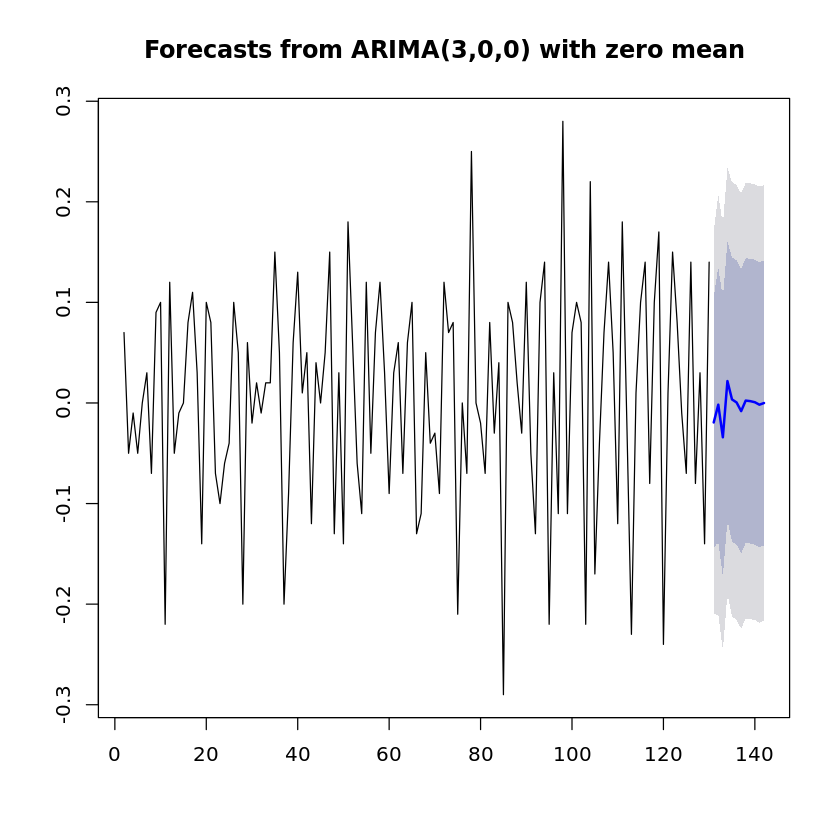

In [87]:
# The 95% confidence interval is -0.2099 to 0.1712
# The estimate of the prediction rMSE is 0.09723

############################################################

# 8) Using all 129 observations, perform 12-month forecast.
#    Plot the graphs.  What is the line that h-step forecast
#    is approaching?
############################################################

plot(forecast(Fit3, 12))

In [88]:
# The line it is approaching is 0, the mean of D2

###########################################################

# 9) Write down mathematical formula for your final AR
#    model.  Don't forget parameters for your error term.
###########################################################

# Xt = -0.4488Xt-1 - 0.3750Xt-2 - 0.3009Xt-3 + et